In [111]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import association_rules, apriori
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
df = pd.read_csv('https://raw.githubusercontent.com/sjsimmo2/DataMining-Fall/master/orderData.csv')
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228699 entries, 0 to 228698
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   orderNo  228699 non-null  int64 
 1   seatNo   228699 non-null  int64 
 2   item     228699 non-null  object
dtypes: int64(2), object(1)
memory usage: 5.2+ MB
   orderNo  seatNo                        item
0   122314       1                      Salmon
1   122314       1  Oyster Bay Sauvignon Blanc
2   122314       1                   Bean Trio
3   122314       2                   Pork Chop
4   122314       2            Three Rivers Red


# Exploring the Data

Our initial goal is to include wine suggestions with each of the main entrees or provide justification for multiple or no suggestions. 

Viewing the data, we can drop every third item as we are not interested in exploring the side dishes currently.

In [118]:
drop_rows = np.arange(2, len(df), 3)
df = df.drop(drop_rows)
entrees = df.iloc[0::2]
df.head()

,orderNo,seatNo,item
0,122314,1,Salmon
1,122314,1,Oyster Bay Sauvignon Blanc
3,122314,2,Pork Chop
4,122314,2,Three Rivers Red
6,122314,3,Sea Bass


/opt/homebrew/Caskroom/miniconda/base/envs/msa/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/msa/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/msa/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


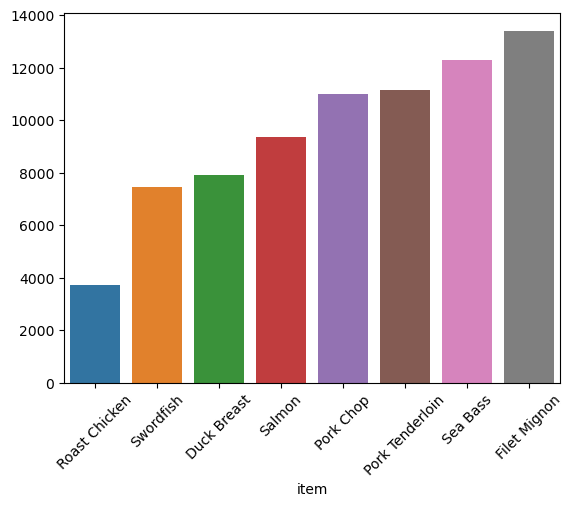

In [119]:
entrees_count = entrees.groupby('item').size().sort_values()
sns.barplot(x=entrees_count.index, y=entrees_count)
plt.xticks(rotation=45)
plt.show()

In [120]:
df_1 = pd.get_dummies(df['item']).astype(int)
df_1['orderNo'] = df['orderNo']
df_1['seatNo'] = df['seatNo']
df_1.head()

,Adelsheim Pinot Noir,Blackstone Merlot,Brancott Pinot Grigio,Cantina Pinot Bianco,Duck Breast,Duckhorn Chardonnay,Echeverria Gran Syrah,Filet Mignon,Helben Blanc,Innocent Bystander Sauvignon Blanc,...,Pork Tenderloin,Roast Chicken,Salmon,Sea Bass,Single Vineyard Malbec,Swordfish,Three Rivers Red,Total Recall Chardonnay,orderNo,seatNo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,122314,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,122314,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,122314,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,122314,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,122314,3


In [123]:
df_1 = df_1.groupby(['orderNo', 'seatNo']).max().map(bool)
entree_wines_assoc = apriori(df_1, min_support = 0.001, use_colnames = True)
out_rules = association_rules(entree_wines_assoc, metric='lift', min_threshold=1.0)
out_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Adelsheim Pinot Noir),(Duck Breast),0.135217,0.103826,0.016476,0.121847,1.173565,0.002437,1.020521,0.171021
1,(Duck Breast),(Adelsheim Pinot Noir),0.103826,0.135217,0.016476,0.158686,1.173565,0.002437,1.027896,0.165030
2,(Filet Mignon),(Adelsheim Pinot Noir),0.175869,0.135217,0.049650,0.282315,2.087867,0.025870,1.204962,0.632232
3,(Adelsheim Pinot Noir),(Filet Mignon),0.135217,0.175869,0.049650,0.367191,2.087867,0.025870,1.302337,0.602512
4,(Adelsheim Pinot Noir),(Pork Tenderloin),0.135217,0.146105,0.043734,0.323438,2.213742,0.023978,1.262110,0.634004
...,...,...,...,...,...,...,...,...,...,...
89,(Three Rivers Red),(Sea Bass),0.018601,0.161374,0.004854,0.260931,1.616936,0.001852,1.134706,0.388778
90,(Three Rivers Red),(Swordfish),0.018601,0.097582,0.001928,0.103667,1.062355,0.000113,1.006788,0.059807
91,(Swordfish),(Three Rivers Red),0.097582,0.018601,0.001928,0.019761,1.062355,0.000113,1.001183,0.065042
92,(Total Recall Chardonnay),(Swordfish),0.105099,0.097582,0.017447,0.166001,1.701136,0.007191,1.082037,0.460562


In [132]:
def is_subset(frozenset: frozenset, frozenset2: frozenset):
    return frozenset.issubset(frozenset2)

In [147]:
unique_entrees = frozenset(entrees['item'].unique())
out_rules['is_subset'] = out_rules.apply(lambda row: is_subset(row['antecedents'], unique_entrees), axis=1)
entree_antecedents = out_rules[out_rules['is_subset']]
entree_antecedents.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,is_subset
1,(Duck Breast),(Adelsheim Pinot Noir),0.103826,0.135217,0.016476,0.158686,1.173565,0.002437,1.027896,0.165030,True
2,(Filet Mignon),(Adelsheim Pinot Noir),0.175869,0.135217,0.049650,0.282315,2.087867,0.025870,1.204962,0.632232,True
5,(Pork Tenderloin),(Adelsheim Pinot Noir),0.146105,0.135217,0.043734,0.299336,2.213742,0.023978,1.234233,0.642088,True
7,(Duck Breast),(Blackstone Merlot),0.103826,0.111304,0.032886,0.316740,2.845736,0.021330,1.300672,0.723740,True
8,(Filet Mignon),(Blackstone Merlot),0.175869,0.111304,0.062729,0.356679,3.204565,0.043154,1.381421,0.834752,True


In [158]:
max_lifts = entree_antecedents.groupby('antecedents')['lift'].idxmax()
entree_antecedents.loc[max_lifts]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,is_subset
7,(Duck Breast),(Blackstone Merlot),0.103826,0.111304,0.032886,0.316740,2.845736,0.021330,1.300672,0.723740,True
8,(Filet Mignon),(Blackstone Merlot),0.175869,0.111304,0.062729,0.356679,3.204565,0.043154,1.381421,0.834752,True
5,(Pork Tenderloin),(Adelsheim Pinot Noir),0.146105,0.135217,0.043734,0.299336,2.213742,0.023978,1.234233,0.642088,True
66,(Roast Chicken),(Oyster Bay Sauvignon Blanc),0.048798,0.063162,0.009471,0.194086,3.072847,0.006389,1.162455,0.709175,True
68,(Salmon),(Oyster Bay Sauvignon Blanc),0.122467,0.063162,0.018365,0.149957,2.374181,0.010630,1.102107,0.659579,True
59,(Sea Bass),(Innocent Bystander Sauvignon Blanc),0.161374,0.083914,0.036651,0.227118,2.706558,0.023109,1.185285,0.751857,True
17,(Swordfish),(Brancott Pinot Grigio),0.097582,0.058741,0.014705,0.150692,2.565370,0.008973,1.108266,0.676175,True
62,(Pork Chop),(Louis Rouge),0.143980,0.033844,0.016555,0.114978,3.397336,0.011682,1.091675,0.824340,True
